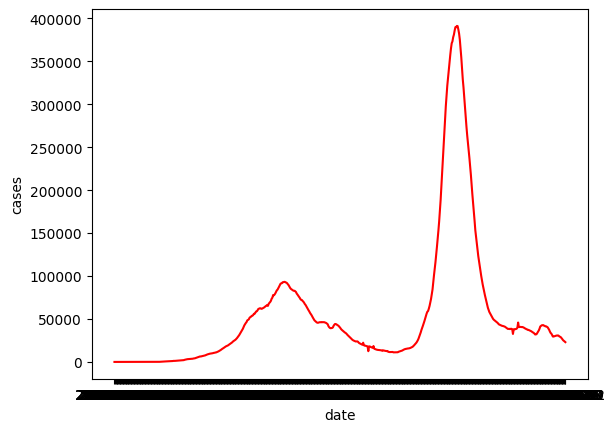

             new_cases  one-day_lag
new_cases     1.000000     0.999064
one-day_lag   0.999064     1.000000


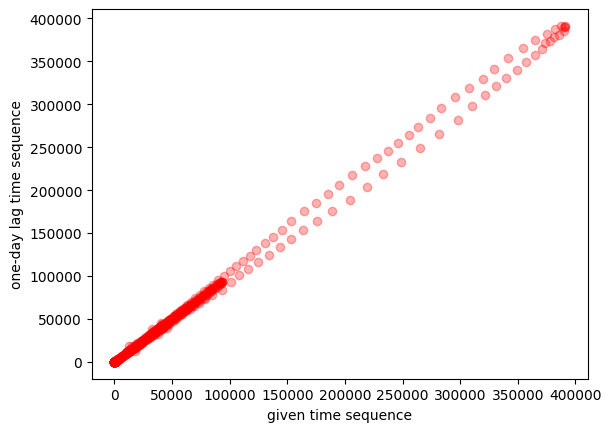

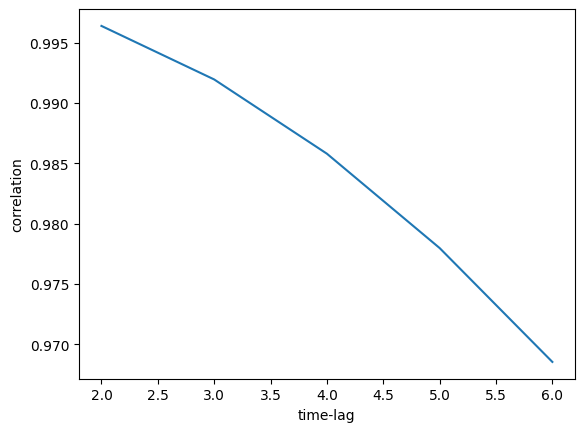

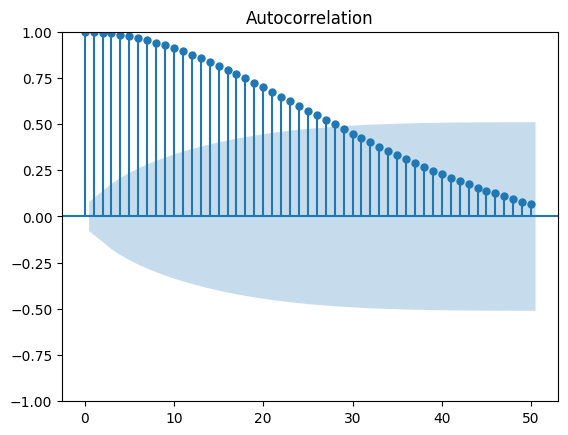

In [15]:
# importing important libraries
import statsmodels.api as sm
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import math

# reading csv file
data = pd.read_csv("daily_covid_cases.csv")
# Creating a line plot with the x-axis as index of the day and y-axis as the number of Covid-19 cases
plt.plot(data["Date"], data["new_cases"], color="r")
plt.xlabel("date")
plt.ylabel("cases")
plt.show()

# Generating another time sequence with a one-day lag
df = data

df["one-day_lag"] = df["new_cases"].shift(1)
print(df.corr(numeric_only = True))

# a scatter plot between the given time sequence and one-day lagged generated sequence
plt.scatter(df["new_cases"], df["one-day_lag"], color="r", alpha=0.3)
plt.xlabel("given time sequence")
plt.ylabel("one-day lag time sequence")
plt.show()

# Generating multiple time sequences with different lag values
df["2-day_lag"] = df["new_cases"].shift(2)
df["3-day_lag"] = df["new_cases"].shift(3)
df["4-day_lag"] = df["new_cases"].shift(4)
df["5-day_lag"] = df["new_cases"].shift(5)
df["6-day_lag"] = df["new_cases"].shift(6)

#  Computing the Pearson correlation coefficient
y_o = []
y_o.append(df["new_cases"].corr(df["2-day_lag"]))
y_o.append(df["new_cases"].corr(df["3-day_lag"]))
y_o.append(df["new_cases"].corr(df["4-day_lag"]))
y_o.append(df["new_cases"].corr(df["5-day_lag"]))
y_o.append(df["new_cases"].corr(df["6-day_lag"]))
x_o = [2, 3, 4, 5, 6]

# Creating a line plot between obtained correlation coefficients
plt.plot(x_o, y_o)
plt.xlabel("time-lag")
plt.ylabel("correlation")
plt.show()

# Ploting a correlogram
sm.graphics.tsa.plot_acf(df["new_cases"], lags=50)
plt.show()


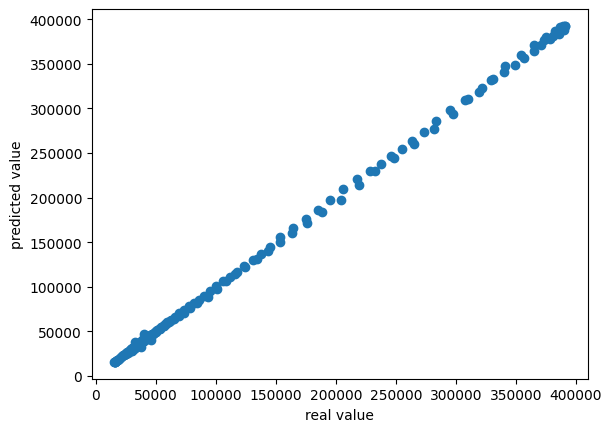

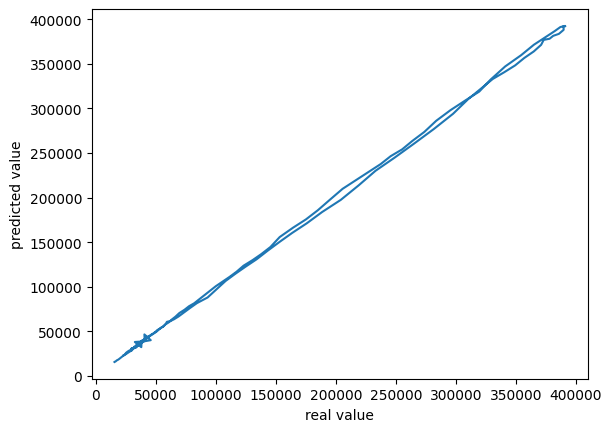

rmse percentage is 1.8247684769390475
mape is :  1.574836382405824


In [16]:
# importing important library
from sklearn.metrics import mean_squared_error
from statsmodels.tsa.ar_model import AutoReg as AR
import statsmodels.api as sm
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import math

# splitting data into train-test
series = pd.read_csv('daily_covid_cases.csv', parse_dates=[
                     'Date'], index_col=['Date'], sep=',')
test_size = 0.35  # 35% for testing
X = series.values
tst_sz = math.ceil(len(X)*test_size)
train, test = X[:len(X)-tst_sz], X[len(X)-tst_sz:]

# computing auto regression model


window = 5  # The lag=5
model = AR(train, lags=window)
model_fit = model.fit()  # fit/train the model
coef = model_fit.params  # Get the coefficients of AR model
# using these coefficients walk forward over time steps in test, one step each time
history = train[len(train)-window:]
history = [history[i] for i in range(len(history))]
predictions = list()  # List to hold the predictions, 1 step at a time
for t in range(len(test)):
    length = len(history)
    lag = [history[i] for i in range(length-window, length)]
    yhat = coef[0]  # Initialize to w0
    for d in range(window):
        yhat += coef[d+1] * lag[window-d-1]  # Add other values
    obs = test[t]
    predictions.append(yhat)  # Append predictions to compute RMSE later
    # Append actual test value to history, to be used in next step.
    history.append(obs)

# scatter plot between actual and predicted values.
plt.scatter(test, predictions)
plt.xlabel("real value")
plt.ylabel("predicted value")
plt.show()


# line plot showing actual and predicted test values.
plt.plot(test, predictions)
plt.xlabel("real value")
plt.ylabel("predicted value")
plt.show()


# RMSE (%) and MAPE between actual and predicted test data
rmse = math.sqrt(mean_squared_error(test, predictions))
rmse_per = rmse/test.mean()*100
print("rmse percentage is", rmse_per)


def f_MAPE(Y_actual, Y_Predicted):
    mape = np.mean(np.abs((Y_actual - Y_Predicted)/Y_actual))*100
    return mape


print("mape is : ", f_MAPE(test, predictions))


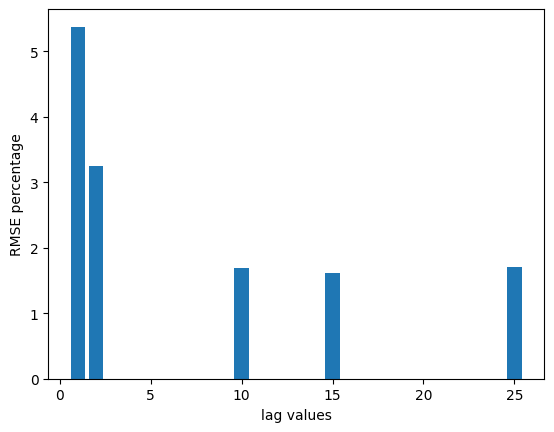

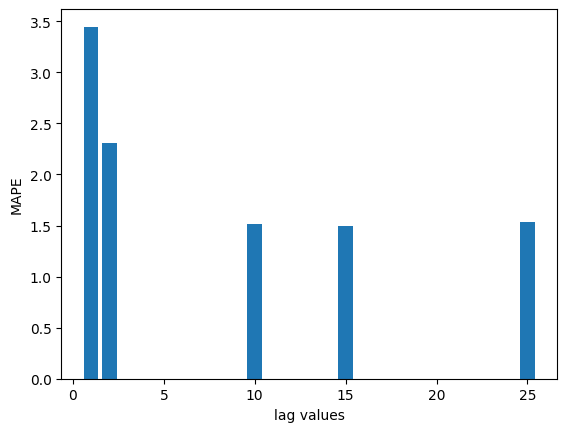

In [17]:
# importing important library
from sklearn.metrics import mean_squared_error
from statsmodels.tsa.ar_model import AutoReg as AR
import statsmodels.api as sm
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import math
# function to genertate mape


def f_MAPE(Y_actual, Y_Predicted):
    mape = np.mean(np.abs((Y_actual - Y_Predicted)/Y_actual))*100
    return mape


# splitting data into train-test
series = pd.read_csv('daily_covid_cases.csv', parse_dates=[
                     'Date'], index_col=['Date'], sep=',')
test_size = 0.35  # 35% for testing
X = series.values
tst_sz = math.ceil(len(X)*test_size)
train, test = X[:len(X)-tst_sz], X[len(X)-tst_sz:]


# Generating five AR models using AutoReg() function with lag values as 1, 5, 10, 15 and 25 days.
windows = [1, 2, 10, 15, 25]
RMSE = []
MAPE = []
for window in windows:
    model = AR(train, lags=window)
    model_fit = model.fit()  # fit/train the model
    coef = model_fit.params  # Get the coefficients of AR model
    # using these coefficients walk forward over time steps in test, one step each time
    history = train[len(train)-window:]
    history = [history[i] for i in range(len(history))]
    predictions = list()  # List to hold the predictions, 1 step at a time
    for t in range(len(test)):
        length = len(history)
        lag = [history[i] for i in range(length-window, length)]
        yhat = coef[0]  # Initialize to w0
        for d in range(window):
            yhat += coef[d+1] * lag[window-d-1]  # Add other values
        obs = test[t]
        predictions.append(yhat)  # Append predictions to compute RMSE later
        # Append actual test value to history, to be used in next step.
        history.append(obs)

    # Computing the RMSE (%) and MAPE between predicted and original test data values in each case.
    rmse = math.sqrt(mean_squared_error(test, predictions))
    rmse_per = rmse/test.mean()*100
    RMSE.append(rmse_per)
    MAPE.append(f_MAPE(test, predictions))

# bar chart showing RMSE (%) on the y-axis and lagged values on the x-axis.
plt.bar(windows, RMSE)
plt.xlabel("lag values")
plt.ylabel("RMSE percentage")
plt.show()

# bar chart showing MAPE on the y-axis and lagged values on the x-axis.
plt.bar(windows, MAPE)
plt.xlabel("lag values")
plt.ylabel("MAPE")
plt.show()
